In [13]:
import numpy as np
from itertools import combinations, product, permutations
import warnings
import time
from idQ import is_parallel, is_strictly_less_than, is_less_equal_than, generate_binary_vectors, generate_permutations, get_D_l, height_of_Q, distances2U, preserve_partial_order, local_identifiability, global_identifiability
from idQ import generate_DAG, generate_hasse_diagram, check_for_identity, Any_two_columns_contain_I, topo_order, incomplete_global_identifiability
import random
from expr_function import random_generate_Q, test_local_identifiability, generate_canonical_matrices, binary_matrix_to_string, sort_lexicographically, random_generate_Q, prop_check, sort_binary_matrix
import sys
import itertools
import cProfile
import random

In [14]:
all_matrices = generate_canonical_matrices(5, 4)
len(all_matrices)

218

In [4]:
J = 5
K = 4

In [5]:
np.random.seed(0)
Q = random_generate_Q(J = 12, K = 6)
Q

array([[0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 1],
       [0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 0]])

In [4]:
Q = np.array([
    [0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 1, 0],
    [0, 1, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 1, 1, 1, 0],
    [1, 1, 1, 0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1, 0, 1, 0]
])

In [3]:
# Find unique rows and their indices
unique_rows, indices = np.unique(Q, axis=0, return_index=True)

# Find duplicate rows
duplicate_rows = np.delete(np.arange(Q.shape[0]), indices)

print("Duplicate rows:", duplicate_rows)

Duplicate rows: [ 2  7 15 16 19]


In [4]:
Q.shape

(20, 8)

In [5]:
Q_unique = np.unique(Q, axis=0)
Q_unique.shape

(15, 8)

In [6]:
Q_unique

array([[0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 0, 1, 0]])

In [7]:
Q = Q_unique

In [16]:
Q

array([[0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 0, 1, 0]])

In [8]:
# Profile the function
cProfile.run('incomplete_global_identifiability(Q_unique, uniout=True, check_level=2)')

         426753088 function calls (426753082 primitive calls) in 327.959 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 38202117   17.323    0.000  155.457    0.000 <__array_function__ internals>:177(all)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(amax)
 12733605    5.814    0.000   59.451    0.000 <__array_function__ internals>:177(any)
     7690    0.004    0.000    0.041    0.000 <__array_function__ internals>:177(array_equal)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(moveaxis)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(prod)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(sum)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(unique)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(where)
        1    0.000    

KeyboardInterrupt: 

In [5]:
# Profile the function
cProfile.run('incomplete_global_identifiability(Q, uniout=True, check_level=5)')

Removed identical rows of Q.
Q may not be identifiable for check_level = 5, the possible Q_bars are: 

[array([[0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0]])]
         536630447 function calls (536630306 primitive calls) in 349.935 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 56427141   26.746    0.000  229.983    0.000 <__array_function__ internals>:177(all)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(amax)
        1    0.000    0.000    0.000    0.

In [29]:
Q = generate_canonical_matrices(5, 4)[4]
Q

In [2]:
Q = np.array([[0, 1, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 1, 1],
              [1, 1, 0, 1]])

In [5]:
generate_combinations(Q)

[(0, 1, 0, 1), (0, 1, 1, 1), (0, 1, 1, 0), (1, 1, 0, 1), (1, 1, 1, 1)]

In [107]:
Q54

[array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 1],
        [1, 0, 1, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 1],
        [1, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 1, 0],
        [1, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 0],
        [1, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 1],
        [1, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 0],
        [1, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 1, 0],
        [1, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0

###  A topological sort is a nonunique permutation of the nodes such that an edge from u to v implies that u appears before v in the topological sort order.

In [4]:
Q54 = []
for Q in generate_canonical_matrices(5, 4):
    id,_ = incomplete_global_identifiability(Q = Q, uniout=True, check_level=3)
    if id & (not check_for_identity(Q)):      
        print(Q)
        Q54.append(Q)

Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q is globally identifiable for check_level = 1.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
[[0 0 0 1]
 [0 0 1 1]
 [0 1 1 0]
 [1 0 0 1]
 [1 1 0 0]]
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
[[0 0 1 0]
 [0 0 1 1]
 [0 1 0 1]
 [1 0 0 1]
 [1 1 0 0]]
Q is globally identifiable for check_level = 3.
[[0 0 0 1]
 [0 0 1 1]
 [0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]]
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
[[0 0 0 1]
 [0 0 1 1]
 [0 1 1 0]
 [1 0 1 1]
 [1 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a one column.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains identical columns.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a one column.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may n

In [5]:
len(Q54)

20

In [9]:
Q54 = []
for Q in generate_canonical_matrices(5, 4):
    id,_ = incomplete_global_identifiability(Q = Q, uniout=True, check_level=1)
    if id & (not check_for_identity(Q)):      
        print(Q)
        Q54.append(Q)

694
218
Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q is globally identifiable for check_level = 1.
Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifia

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not be identifiable for check_level = 1, the possible Q_bars are: 

Q might not 

In [5]:
len(Q54)

2

In [11]:
Q54

[array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 0, 0]])]

In [15]:
QQ = np.array(generate_binary_vectors(4, 2)[0:5])

In [16]:
QQ

array([[1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1]])

In [24]:
incomplete_global_identifiability(Q = QQ, uniout=True, check_level=1)

Q might not be identifiable for check_level = 1, the possible Q_bars are: 



(0,
 [array([[1, 1, 0, 0],
         [1, 0, 1, 0],
         [1, 0, 0, 1],
         [0, 1, 1, 0],
         [0, 0, 1, 1]])])

In [29]:
_, Q_bar = incomplete_global_identifiability(Q = QQ, uniout=True, check_level=1)

Q might not be identifiable for check_level = 1, the possible Q_bars are: 



In [30]:
Q_bar

[array([[1, 1, 0, 0],
        [1, 0, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 0],
        [0, 0, 1, 1]])]

In [56]:
Q54 = []
for Q in generate_canonical_matrices(5, 4):
    id,_ = incomplete_global_identifiability(Q = Q, uniout=True, check_level=3)
    if id & (not check_for_identity(Q)):      
        print(Q)
        Q54.append(Q)

Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q is globally identifiable for check_level = 1.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
[[0 0 0 1]
 [0 0 1 1]
 [0 1 1 0]
 [1 0 0 1]
 [1 1 0 0]]
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
[[0 0 1 0]
 [0 0 1 1]
 [0 1 0 1]
 [1 0 0 1]
 [1 1 0 0]]
Q is globally identifiable for check_level = 3.
[[0 0 0 1]
 [0 0 1 1]
 [0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]]
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
[[0 0 0 1]
 [0 0 1 1]
 [0 1 1 0]
 [1 0 1 1]
 [1 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a one column.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains identical columns.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a one column.
Q may n

In [57]:
len(Q54)

20

In [15]:
Q54

[array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 1],
        [1, 1, 1, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 1, 0],
        [1, 1, 0, 1]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 1],
        [1, 1, 1, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 0, 1, 0],
        [1, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [1, 1, 0

In [13]:
global_identifiability(Q = Q54[1], uniout=True, check_level=4)

IndexError: list index out of range

In [3]:
K = 4

In [5]:
len([seq for seq in itertools.product([0, 1], repeat=K)])

16

In [27]:
[1]*4

[1, 1, 1, 1]

In [2]:
def T_mat(Q):
    J, K = Q.shape
    pp = [seq for seq in itertools.product([0, 1], repeat=K)]
    TT = []
    TT.append([1]*(2**K))
    for l in range(1, J+1):
        Dl = get_D_l(Q, l)
        for item in Dl:
            TT.append((list(is_less_equal_than(item, p) for p in pp)))
    return np.array(TT)

def column_rank_T_mat(Q):
    TT = T_mat(Q)
    return(np.linalg.matrix_rank(TT))

In [33]:
T_mat(Q).shape

(32, 16)

In [44]:
incomplete_global_identifiability(Q = Q, uniout=True, check_level=1)

Q might not be identifiable for check_level = 1, the possible Q_bars are: 



(0, [<itertools.chain at 0x151d4c083ac0>])

In [35]:
T_mat(Q)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1,

In [46]:
column_rank_T_mat(np.eye(4).astype(int))

16

In [5]:
len(Q54)

20

In [6]:
len(Q54nontrivial)

17

In [23]:
def any_3_columns_id(Q):
    """
    Checks if any three columns of the binary matrix Q (shape JxK) is identifiable.

    Parameters
    ----------
    Q : numpy.ndarray
        Binary matrix of size JxK to check.

    Returns
    -------
    bool
        True if any two columns of Q contain the 2x2 identity matrix, False otherwise.
    """
    J, K = Q.shape
    # Combinations of K choose 2 for column pairs
    column_combinations = combinations(range(K), 3)
    
    for cols in column_combinations:
        sub_matrix = Q[:, cols]
        id,_ = incomplete_global_identifiability(Q = sub_matrix, uniout=True, check_level=2)
        if not id:
            return False

    return True

In [17]:
Q54nontrivial[0]

array([[0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 0, 1, 0]])

In [25]:
any_3_columns_id(Q54nontrivial[0])

Q is globally identifiable for check_level = 1.
Q is globally identifiable for check_level = 1.
All-zero rows have been removed from Q.
Removed identical rows of Q.
Q may not be identifiable for check_level = 1, the possible Q_bars are: 



False

In [30]:
QQ[0]

array([[0, 0, 1, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 1, 1, 0]])

In [42]:
Q_bar

[array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])]

In [40]:
_,Q_bar = incomplete_global_identifiability(Q = QQ[0], uniout=True, check_level=3)

Q may not be identifiable for check_level = 2, the possible Q_bars are: 



In [6]:
import networkx as nx
import matplotlib.pyplot as plt
def draw_hasse_diagram(Q):
    # Define node positions
    positions = {
        '1000': (2,2), '0100': (4,2), '0010': (6,2), '0001': (8,2),
        '1100': (1,4), '1010': (3,4), '1001': (5,4), '0110': (7,4), '0101': (9,4), '0011': (11,4),
        '1110': (2,6), '1101': (4,6), '1011': (6,6), '0111': (8,6),
        '1111': (5,8)
    }

    # Create graph
    G = nx.DiGraph()

    # Add nodes to the graph
    for node in positions.keys():
        G.add_node(node)

    # Define edges
    edges = [
        ('1000', '1100'), ('1000', '1010'), ('1000', '1001'),
        ('0100', '1100'), ('0100', '0110'), ('0100', '0101'),
        ('0010', '1010'), ('0010', '0110'), ('0010', '0011'),
        ('0001', '1001'), ('0001', '0101'), ('0001', '0011'),
        ('1100', '1110'), ('1100', '1101'),
        ('1010', '1110'), ('1010', '1011'),
        ('1001', '1101'), ('1001', '1011'),
        ('0110', '1110'), ('0110', '0111'),
        ('0101', '1101'), ('0101', '0111'),
        ('0011', '1011'), ('0011', '0111'),
        ('1110', '1111'),
        ('1101', '1111'),
        ('1011', '1111'),
        ('0111', '1111')
    ]

    # Add edges to the graph
    G.add_edges_from(edges)

    # Convert Q to a list of strings
    Q_str = ["".join(map(str, row)) for row in Q.tolist()]
    DQ = ["".join(map(str, row)) for row in get_D(Q)]
    
    # Define node colors
    node_colors = ['red' if node in Q_str else 'lightblue' if node in DQ else 'white' for node in G.nodes()]

    # Draw the graph
    nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, node_size=1500)

    # Add text "q_i" beneath each node in Q_str
    for i, node in enumerate(Q_str, 1):
        plt.text(positions[node][0], positions[node][1] - 0.75, f'$q_{i}$', horizontalalignment='center', fontsize=14)

    plt.title('Hasse Diagram for D(Q)')
    plt.show()

In [7]:
def get_D_l(Q, l):
    # Get the total number of rows
    J = Q.shape[0]
    
    # Create an empty list to store the resulting vectors
    D_l = []
    
    # Generate all combinations of l rows
    for row_indices in combinations(range(J), l):
        # Select the rows specified by the current combination
        rows = Q[row_indices, :]
        
        # Perform the bitwise OR operation on the selected rows and add the result to D_l
        D_l.append(np.bitwise_or.reduce(rows, axis=0))
    
    # Convert D_l to a NumPy array
    D_l = np.array(D_l)
    
    return D_l
def get_D(Q):
    # Get the total number of rows
    J = Q.shape[0]
    D = set()
    for l in range(1, J+1):
        # Generate all combinations of l rows
        for row_indices in combinations(range(J), l):
            # Select the rows specified by the current combination
            rows = Q[row_indices, :]

            # Perform the bitwise OR operation on the selected rows and add the result to D_l
            D.add(tuple(np.bitwise_or.reduce(rows, axis=0)))
    
    return D

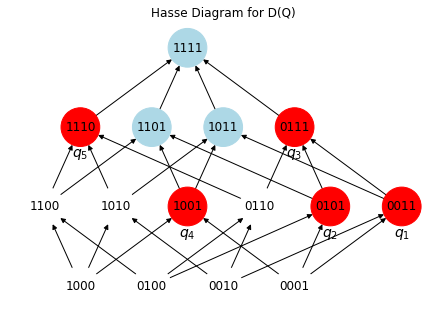

In [39]:
draw_hasse_diagram(QQ[0])

In [14]:
Q = np.array([[0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 1],
        [1, 0, 0, 1],
        [1, 1, 1, 0]])

In [15]:
T_mat(Q)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
T_mat(Q22) - 

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
Q_bar

[array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])]

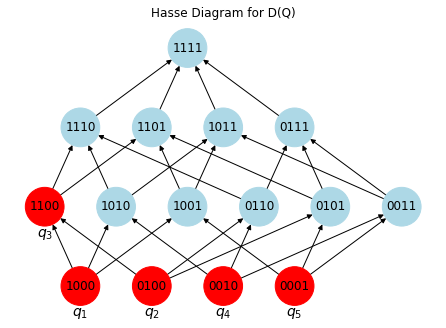

In [44]:
draw_hasse_diagram(Q_bar[0])

In [16]:
Q_bar = np.array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])

In [21]:
T_mat(Q_bar)[1:7]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

In [22]:
T_mat(Q)[1:7]

array([[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [28]:
QQ = []
for Q in Q54nontrivial:
    if any_3_columns_id(Q):
        QQ.append(Q)

Q is globally identifiable for check_level = 1.
Q is globally identifiable for check_level = 1.
All-zero rows have been removed from Q.
Removed identical rows of Q.
Q may not be identifiable for check_level = 1, the possible Q_bars are: 

All-zero rows have been removed from Q.
Removed identical rows of Q.
Q may not be identifiable for check_level = 1, the possible Q_bars are: 

Removed identical rows of Q.
Q is globally identifiable for check_level = 1.
Removed identical rows of Q.
Q is globally identifiable for check_level = 1.
Removed identical rows of Q.
Q is globally identifiable for check_level = 1.
All-zero rows have been removed from Q.
Q may not be identifiable for check_level = 1, the possible Q_bars are: 

Q is globally identifiable for check_level = 2.
Q is globally identifiable for check_level = 2.
Q is globally identifiable for check_level = 2.
All-zero rows have been removed from Q.
Q may not be identifiable for check_level = 1, the possible Q_bars are: 

Q is globally i

In [61]:
Q54nontrivial

[array([[0, 0, 1, 1],
        [0, 1, 0, 0],
        [0, 1, 1, 1],
        [1, 0, 0, 1],
        [1, 0, 1, 0]]),
 array([[0, 0, 0, 1],
        [0, 1, 1, 0],
        [0, 1, 1, 1],
        [1, 0, 1, 0],
        [1, 1, 0, 1]]),
 array([[0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 0],
        [0, 1, 1, 1],
        [1, 0, 0, 0]]),
 array([[0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 0, 0],
        [1, 1, 1, 1]]),
 array([[0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 1],
        [1, 0, 0, 0],
        [1, 1, 1, 0]]),
 array([[0, 0, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 1, 0],
        [1, 1, 0, 1],
        [1, 1, 1, 1]]),
 array([[0, 0, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0]]),
 array([[0, 0, 0, 1],
        [0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0]]),
 array([[0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 1],
        [1, 0, 0, 1],
        [1, 1, 1

In [4]:
Q54 = []
Q54nontrivial = []
for Q in generate_canonical_matrices(5, 4):
    id,Q_bar = incomplete_global_identifiability(Q = Q, uniout=True, check_level=3)
    if not id:
        if Any_two_columns_contain_I(Q):
            Q54nontrivial.append(Q)
    else:
        if not check_for_identity(Q):
            Q54.append(Q)

Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q is globally identifiable for check_level = 1.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the

Q is globally identifiable for check_level = 3.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
Q is globally identifiable for check_level = 3.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars a

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a one column.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains identical columns.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a one column.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 1, the possible Q_bars are: 



In [17]:
Q54nontrivial = []
for Q in generate_canonical_matrices(5, 4):
    id,Q_bar = incomplete_global_identifiability(Q = Q, uniout=True, check_level=3)
    if not id:      
        if Any_two_columns_contain_I(Q):
            Q54nontrivial.append(Q)
            print(Q)
            print(Q_bar)

Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q is globally identifiable for check_level = 1.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a zero column.
Q is trivially not identifiable. Q contains a zero column.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
Q is globally identifiable for check_level = 3.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q is globally identifiable for check_level = 3.
Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars are: 

Q may not be identifiable for check_level = 3, the possible Q_bars a

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a one column.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains identical columns.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q is trivially not identifiable. Q contains a one column.
Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 2, the possible Q_bars are: 

Q may not be identifiable for check_level = 1, the possible Q_bars are: 

[[0 1 1

In [18]:
len(Q54nontrivial)

4

In [19]:
Q54nontrivial

[array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 1, 1],
        [1, 1, 1, 1]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 1, 1]]),
 array([[0, 0, 0, 1],
        [0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 1]]),
 array([[0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0],
        [1, 1, 1, 1]])]

In [26]:
Q54nontrivial[0]

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 1],
       [1, 1, 1, 1]])

In [45]:
Any_two_columns_contain_I(Q54nontrivial[0])

True

In [20]:
for Q in Q54nontrivial:
    print(Any_two_columns_contain_I(Q))

True
True
True
True


In [47]:
Q = Q54nontrivial[0][:,[0,1]]

In [55]:
check_for_identity(Q54nontrivial[0][:,[0,1]])

False

In [50]:
Q

array([[0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1]])

In [52]:
np.unique(Q, axis = 0)

array([[0, 0],
       [0, 1],
       [1, 1]])

In [ ]:
Q = np.array([[0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 1],
        [1, 0, 0, 1],
        [1, 1, 1, 0]])

In [15]:
Q = np.array([
        [0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]])

In [16]:
I3 = np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [17]:
T_mat(I3)

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [18]:
T_mat(Q)

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [19]:
def check_columns_inclusion(T1, T2):
    """
    Checks if all columns of matrix T1 are present in matrix T2.

    Parameters
    ----------
    T1 : numpy.ndarray
        Matrix of size JxK1.
    T2 : numpy.ndarray
        Matrix of size JxK2.

    Returns
    -------
    bool
        True if all columns of T1 are in T2, False otherwise.
    """
    for col in T1.T:
        if not any(np.all(col == T2_col) for T2_col in T2.T):
            return False
    return True

# Test the function
T1 = np.array([[1, 0],
               [0, 1],
               [0, 0]])

T2 = np.array([[1, 0, 1],
               [0, 1, 1],
               [0, 0, 0]])

T3 = np.array([[1, 1],
               [0, 0],
               [0, 1]])

print("T1 in T2:", check_columns_inclusion(T1, T2))
print("T1 in T3:", check_columns_inclusion(T1, T3))
print("T3 in T2:", check_columns_inclusion(T3, T2))


T1 in T2: True
T1 in T3: False
T3 in T2: False


In [21]:
check_columns_inclusion(T_mat(I3), T_mat(Q))

False